# Carregar os Dados das Simulações

In [40]:
import pickle
from deposicao import DeposicaoAleatoria, DeposicaoAleatoriaRelaxacaoSuperficial, DeposicaoBalistica

diretorio = {
    DeposicaoAleatoria: 'DA',
    DeposicaoAleatoriaRelaxacaoSuperficial: 'DARS',
    DeposicaoBalistica: 'DB'
}

logscale = {
    DeposicaoAleatoria: False,
    DeposicaoAleatoriaRelaxacaoSuperficial: True,
    DeposicaoBalistica: True
}

comprimentos_subestratos = [1600]
#comprimentos_subestratos = [200, 400, 800, 1600]

'''
    Descomente a forma de deposição desejada (Aleatoria, Aleatoria com Relaxação
    Superficial ou Balística) e comente as demais.
'''

#forma_deposicao = DeposicaoAleatoria
#forma_deposicao = DeposicaoAleatoriaRelaxacaoSuperficial
forma_deposicao = DeposicaoBalistica

dados_medios = {}

for L in comprimentos_subestratos:
    f = open('simulacoes/'+ diretorio[forma_deposicao] +'/L_{}'.format(L), 'rb')
    dados_medios[L] = pickle.load(f)
    f.close()

# Plotar a Evolução do Crescimento dos Subestratos

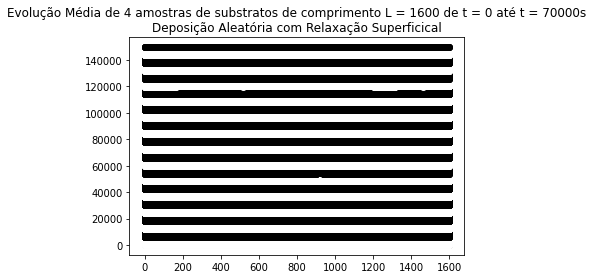

In [41]:
import importlib
import simulacao_utils
importlib.reload(simulacao_utils)

comutar_representacao = lambda r: 'wo' if r == 'ko' else 'ko'

for L in comprimentos_subestratos:
    t_comutacao = dados_medios[L]['snapshots'] // 25
    simulacao_utils.plotar_instantaneos(
        'Evolução Média de {} amostras de substratos de comprimento L = {} de t = 0 até t = {}s\n'.format(
            dados_medios[L]['amostras'],
            L,
            dados_medios[L]['tempo_maximo']
        )
      + 'Deposição Aleatória com Relaxação Superficical',
        dados_medios[L]['interfaces'],
        [dados_medios[L]['evolucao_subestratos'][t] for t in range(dados_medios[L]['snapshots'])],
        t_comutacao = t_comutacao,
        comutar_representacao = comutar_representacao
    )

# Plotar Cada uma das rugosidades dos diferentes subestratos

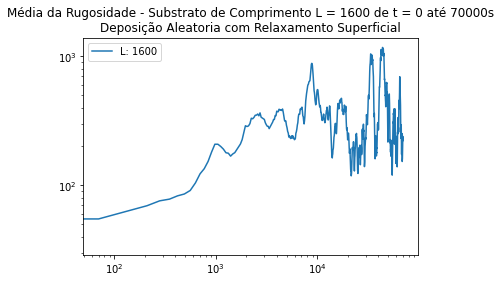

In [42]:
import importlib
import simulacao_utils
import numpy as np
importlib.reload(simulacao_utils)

for L in comprimentos_subestratos:
    simulacao_utils.plotar_rugosidades('Média da Rugosidade - Substrato de Comprimento L = {} de t = 0 até {}s\n'.format(L, dados_medios[L]['tempo_maximo'])
                     + 'Deposição Aleatoria com Relaxamento Superficial',
                       [
                          np.stack([
                                      dados_medios[L]['rugosidades'], 
                                      np.linspace(0,dados_medios[L]['tempo_maximo'],dados_medios[L]['snapshots'])
                                   ],
                          axis = 0)
                       ],
                       [L],
                       logscale = logscale[forma_deposicao])

# Plotar Sobreposição (e eventual colapso) das Curvas de Rugosidade

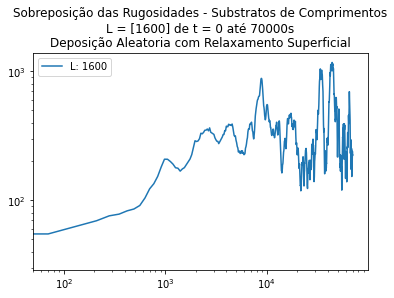

In [43]:
importlib.reload(simulacao_utils)

rugosidades_a_sobrepor = [
    np.stack([
        dados_medios[L]['rugosidades'], 
        np.linspace(0,dados_medios[L]['tempo_maximo'],dados_medios[L]['snapshots'])
        ],
        axis = 0
    )
    for L in comprimentos_subestratos
]

simulacao_utils.plotar_rugosidades(
                'Sobreposição das Rugosidades - Substratos de Comprimentos\n'
              + 'L = {} de t = 0 até {}s\n'.format(comprimentos_subestratos, dados_medios[L]['tempo_maximo'])
              + 'Deposição Aleatoria com Relaxamento Superficial',
                rugosidades_a_sobrepor,
                comprimentos_subestratos,
                logscale = logscale[forma_deposicao]
)